<a href="https://colab.research.google.com/github/AlanFirmino2024/Introducao_a_ciencia_de_dados/blob/main/07_classifica%C3%A7%C3%A3o_bin%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando bibliotecas

In [6]:
# Algoritimo kNN e Métricas de Avaliação de Classificação Binária

## 1. Introdução

#Este notebook apresenta os conceitos do uso do algoritimo k-Nearest Neighbors (kNN) para classificação binária. Vamos criar um conjunto de dados sintético,
#treinar o algoritmo no conjunto de treino, testa o algoritmo no conjunto de teste e avaliar seu desempenho usando a matriz de confusão e a curva ROC.

## 2. Criação do Conjunto de Dados Sintético

#Importa a biblioteca Numpy
import numpy as np
#Importa a biblioteca pandas
import pandas as pd
#Importa a função make_classification da biblioteca Scikit-learn, usada para
#gerar conjuntos de dados sintéticos.
from sklearn.datasets import make_classification
#Importa a biblioteca Matplotlib, usada para criar visualizações gráficas.
import matplotlib.pyplot as plt
#Importa a função train_test_split que divide o data set em treino e teste.
from sklearn.model_selection import train_test_split
#Importa a classe KNeighborsClassifier, que implementa o algoritmo kNN.
from sklearn.neighbors import KNeighborsClassifier
#Importa a função confusion_matrix que é usada para calcular a matriz de confusão.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Importa as funções roc_curve e AUC que são usadas para calcular e avaliar modelos.
from sklearn.metrics import roc_curve, auc
#Importa a função classification_report que é usada para calcular e avaliar modelos.
from sklearn.metrics import classification_report
# Importa a classe para padronização dos dados
from sklearn.preprocessing import StandardScaler

## 2. Criando conjunto de dados sintéticos

A função "***make_classification***" cria um conjunto de dados sintético para um problema de classificação binária, onde X contém as características (features) e y os rótulos (targets). Nesse caso geramos 1000 amostras, onde cada amostra possui 2 características que são informativas e não redundantes.

In [7]:
#Cria um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
# Criando desigualdade de escala: multiplicando a primeira coluna por 1000
X[:, 0] = X[:, 0] * 1000
 # Exibindo as primeiras 5 linhas do conjunto de dados
X[:5]


array([[ 6.01034179e+02,  1.53535250e+00],
       [ 7.55945258e+02, -1.17235190e+00],
       [ 1.35447877e+03, -9.48528414e-01],
       [ 3.10308970e+03,  2.33484843e-01],
       [ 7.53177794e+02,  7.87514266e-01]])

## 3. Padronização de dados

A padronização é necessária porque o algoritmo kNN depende da distância entre os pontos.
Se as escalas forem muito diferentes, uma variável pode dominar a outra, resultando em um modelo enviesado.

In [8]:
# Aplicação do procedimento de padronização dos dados a partir da criação do objeto.
scaler = StandardScaler()
# Padronização dos dados
X_scaled = scaler.fit_transform(X)
# Exibindo as primeiras 5 linhas dos dados padronizados
X_scaled[:5]

array([[-0.39667297,  1.26395306],
       [-0.25202078, -0.9468418 ],
       [ 0.30687523, -0.7640937 ],
       [ 1.9396855 ,  0.20100013],
       [-0.25460497,  0.65335578]])

## 4. Criando Dataframes e salvando dados

In [9]:
# Criação de DataFrame com dados originais
df_original = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
# Criação de DataFrame com dados padronizados
df_scaled = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
# Salvando dados originais em um arquivo CSV
df_original.to_csv('dados_originais.csv', index=False)
# Salvando dados padronizados em um arquivo CSV
df_scaled.to_csv('dados_padronizados.csv', index=False)

## 5. Divisão de dados em **"treino"** e **"teste"**

In [10]:
#Divide o conjunto de dados originais em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Divide o conjunto de dados padronizados em treino e teste
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## 6. Treinando algoritmo kNN e realizando as predições do modelo

In [11]:
# Criando o classificador kNN
knn_original = KNeighborsClassifier(n_neighbors=5)
# Treinando o modelo com os dados originais
knn_original.fit(X_train, y_train)

# Criando o classificador kNN
knn_scaled = KNeighborsClassifier(n_neighbors=5)
# Treinando o modelo com os dados padronizados
knn_scaled.fit(X_train_scaled, y_train_scaled)

# Predição do modelo usando dados de teste originais
y_pred_original = knn_original.predict(X_test)
# Predição do modelo usando dados de teste padronizados
y_pred_scaled = knn_scaled.predict(X_test_scaled)

## 7. Matriz de confusão

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       147
           1       0.49      0.52      0.50       153

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       147
           1       0.96      0.91      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



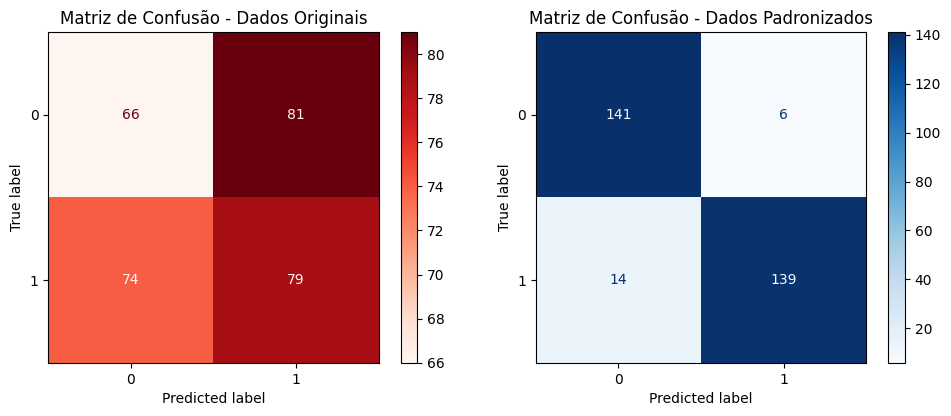

In [12]:
# Cria um grid de subplots com 1 linha e 2 colunas
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

#Calcula a matriz de confusão comparando os rótulos reais (y_test) com os rótulos previstos pelo modelo de dados originais (y_pred_original).
cm = confusion_matrix(y_test, y_pred_original)
#Avalia o desempenho do modelo
print("Relatório de classificação:\n", classification_report(y_test, y_pred_original))
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Reds'.
disp.plot(ax=ax[0], cmap='Reds')
#Define o título do gráfico 1 como "Matriz de Confusão - Dados Originais".
ax[0].set_title('Matriz de Confusão - Dados Originais')


#Calcula a matriz de confusão comparando os rótulos reais (y_test_scaled) com os rótulos previstos pelo modelo de dados padronizados (y_pred_scaled).
cm1 = confusion_matrix(y_test_scaled, y_pred_scaled)
#Avalia o desempenho do modelo
print("Relatório de classificação:\n", classification_report(y_test_scaled, y_pred_scaled))
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Blues'.
disp.plot(ax=ax[1], cmap='Blues')
#Define o título do gráfico 1 como "Matriz de Confusão - Dados Originais".
ax[1].set_title('Matriz de Confusão - Dados Padronizados')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

#Exibe o gráfico com a matriz de confusão.
plt.show()

## 8. Curva ROC

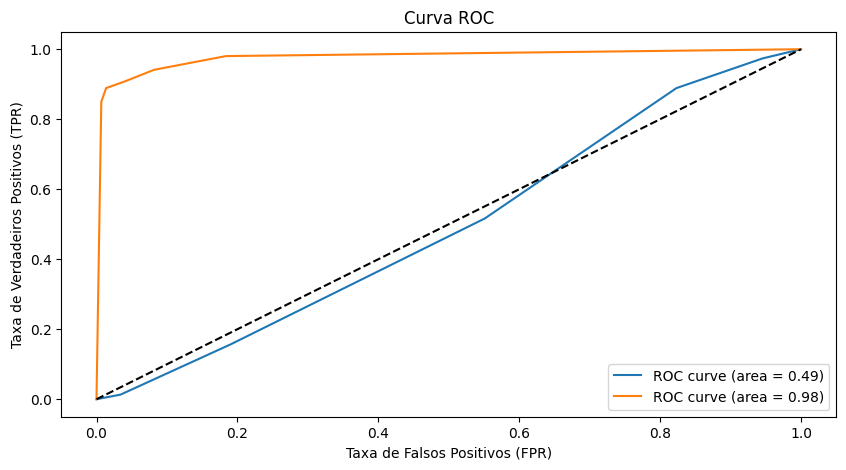

In [13]:
# Calcula as previsões de probabilidade no conjunto de teste original.
y_prob = knn_original.predict_proba(X_test)[:, 1]
# Calcula as previsões de probabilidade no conjunto de teste padronizado.
y_prob_scaled = knn_scaled.predict_proba(X_test_scaled)[:, 1]
# Calcula os pontos necessários para traçar a curva ROC.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calcula os pontos necessários para traçar a curva ROC.
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test_scaled, y_prob_scaled)
#Calcula a AUC (Área Sob a Curva) da curva ROC. Quanto mais proximo de 1, melhor.
roc_auc = auc(fpr, tpr)
#Calcula a AUC (Área Sob a Curva) da curva ROC. Quanto mais proximo de 1, melhor.
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

# Plotando a curva ROC

plt.figure(figsize=(10, 5))
#Plota a curva ROC usando os valores de FPR e TPR calculados. A legenda no gráfico exibe a AUC calculada.
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
#Plota a curva ROC usando os valores de FPR e TPR calculados. A legenda no gráfico exibe a AUC calculada.
plt.plot(fpr_scaled, tpr_scaled, label=f'ROC curve (area = {roc_auc_scaled:.2f})')
#Plota a linha diagonal que representa uma classificação aleatória.
plt.plot([0, 1], [0, 1], 'k--')
#Define o rótulo do eixo x como 'Taxa de Falsos Positivos (FPR)'.
plt.xlabel('Taxa de Falsos Positivos (FPR)')
#Define o rótulo do eixo y como 'Taxa de Verdadeiros Positivos (TPR)'.
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
#Define o título do gráfico como 'Curva ROC'.
plt.title('Curva ROC')
#Ativa a legenda no gráfico.
plt.legend(loc='lower right')
#Exibe o gráfico com a curva ROC.
plt.show()


## 9. Erro em função de k

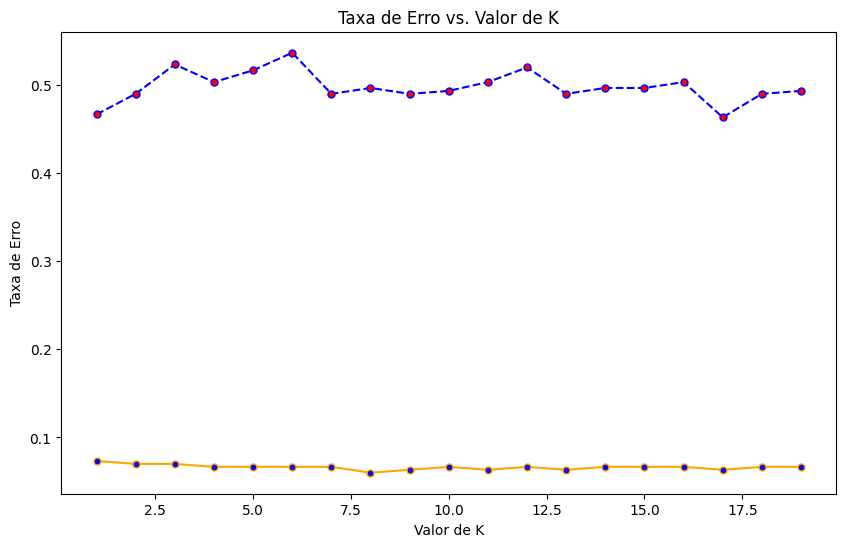

In [14]:
#Inicializa duas listas para armazenar a taxa de erro para cada valor de k.
error_original = []
error_scaled = []
#Inicia um loop para iterar sobre diferentes valores de k (1 a 19).
for i in range(1, 20):
    #Cria um modelo kNN com o valor de k=i.
    knn = KNeighborsClassifier(n_neighbors=i)
    #Treina o modelo com conjunto de treino de dados originais.
    knn.fit(X_train, y_train)
    #Faz previsões no conjunto de teste de dados originais.
    pred_i = knn.predict(X_test)
    #Calcula a taxa de erro (proporção de previsões incorretas) e adiciona à lista.
    error_original.append(np.mean(pred_i != y_test))

    #Treina o modelo com conjunto de treino de dados padronizados.
    knn.fit(X_train_scaled, y_train_scaled)
    #Faz previsões no conjunto de teste de dados padronizados.
    y_pred_k_scaled = knn.predict(X_test_scaled)
    #Calcula a taxa de erro (proporção de previsões incorretas) e adiciona à lista.
    error_scaled.append(np.mean(y_pred_k_scaled != y_test_scaled))

#Plota a taxa de erro em função de k.
plt.figure(figsize=(10,6))
#Plota a taxa de erro em função de k.
plt.plot(range(1, 20), error_original, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
#Plota a taxa de erro em função de k.
plt.plot(range(1, 20), error_scaled, color='orange', marker='o', markerfacecolor='blue', markersize=5)
#Define o título do gráfico.
plt.title('Taxa de Erro vs. Valor de K')
#Define o rótulo do eixo x como 'Valor de K'.
plt.xlabel('Valor de K')
#Define o rótulo do eixo y como 'Taxa de Erro'.
plt.ylabel('Taxa de Erro')
#Exibe o gráfico.
plt.show()

## 10. Visualização da fronteira de decisão

In [15]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model, title, ax):
    #Define o passo da malha para visualização da fronteira de decisão.
    h = .02
    #Define os limites mínimo e máximo do eixo x.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #Define os limites mínimo e máximo do eixo y.
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Cria uma malha de pontos para visualizar a fronteira de decisão.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #Faz previsões na malha de pontos.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #Reconstrói a forma original das previsões.
    Z = Z.reshape(xx.shape)

    #Plota a fronteira de decisão e os pontos de treinamento.
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    #Define o título do gráfico.
    ax.set_title(title)
    #Define os rótulos dos eixos x.
    ax.set_xlabel("Feature 1")
    #Define os rótulos dos eixos y.
    ax.set_ylabel("Feature 2")


In [ ]:
# Criando um grid de subplots com 1 linha e 2 colunas para fronteiras de decisão
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotando a fronteira de decisão para os dados originais
plot_decision_boundary(X_train, y_train, knn_original, 'Fronteira de Decisão - Dados Originais', ax[0])

# Plotando a fronteira de decisão para os dados padronizados
plot_decision_boundary(X_train_scaled, y_train_scaled, knn_scaled, 'Fronteira de Decisão - Dados Padronizados', ax[1])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico com as fronteiras de decisão
plt.show()